# Rylan Larsen - Lesson 9 Homework

For this homework, we attempted to classify the various objects in the cifar10 dataset. To do this, I adjusted both the number of layers, number of neurons in the first layer, and the activation functions. Despite this, accuracy was still pretty poor (~45%), although this is above chance. The best performance was with a model that had two hidden layers using 1 Relu and 1 sigmoid activation Functions.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Load dataset and explore images, normalize the values to 1 

In [30]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

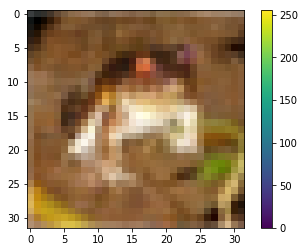

In [31]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

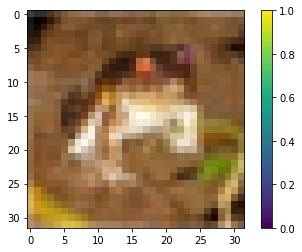

In [5]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

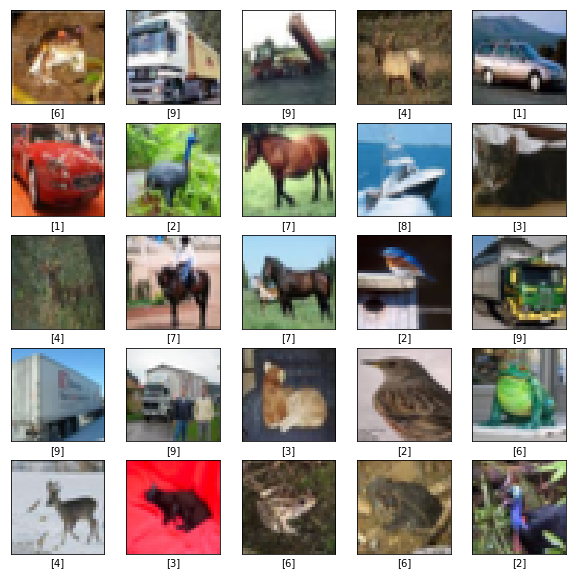

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# Build first Neural Network with one hidden layer

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 7s 131us/step - loss: 1.8911 - acc: 0.3204
Epoch 2/5
50000/50000 [==============================] - 5s 106us/step - loss: 1.7455 - acc: 0.3765
Epoch 3/5
50000/50000 [==============================] - 6s 112us/step - loss: 1.7033 - acc: 0.3949
Epoch 4/5
50000/50000 [==============================] - 5s 107us/step - loss: 1.6724 - acc: 0.4027
Epoch 5/5
50000/50000 [==============================] - 5s 110us/step - loss: 1.6502 - acc: 0.4098


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 64us/step
Test accuracy: 0.4189


In [11]:
predictions = model.predict(x_test)

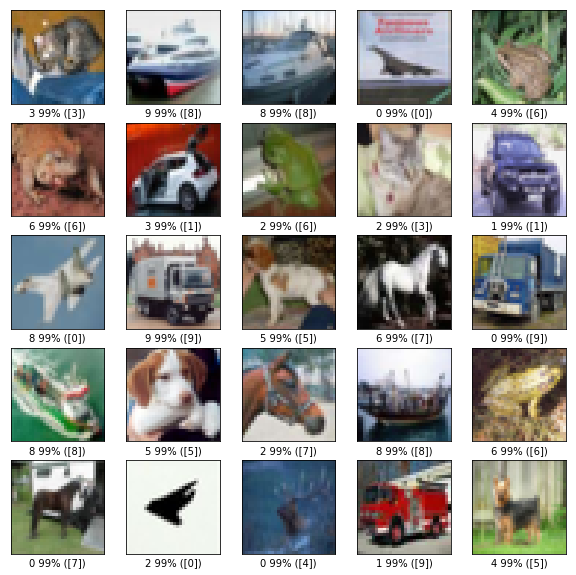

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

The current model accuracy is quite poor (41%), we will therefore try improving it by adding more neurons to the first layer

# Change Model 1/3: add more neurons to first layer


In [13]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 9s 176us/step - loss: 1.8958 - acc: 0.3224
Epoch 2/5
50000/50000 [==============================] - 8s 164us/step - loss: 1.7109 - acc: 0.3870
Epoch 3/5
50000/50000 [==============================] - 8s 166us/step - loss: 1.6496 - acc: 0.4106
Epoch 4/5
50000/50000 [==============================] - 8s 161us/step - loss: 1.6133 - acc: 0.4256
Epoch 5/5
50000/50000 [==============================] - 8s 162us/step - loss: 1.5853 - acc: 0.4330


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/step
Test accuracy: 0.4312


# Change Model 2/3: add a second hidden layer with a sigmoid activation function


Adding more neurons to the first layer only slightly improved the accuracy (43 versus 41), next I tried adding a second hidden layer with a sigmoid activation

In [23]:
model = keras.Sequential()
model.add(Flatten())
model.add(keras.layers.Dense(500, activation=tf.nn.relu))
model.add(keras.layers.Dense(50, kernel_initializer='normal', activation='sigmoid'))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))


In [24]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 70s 1ms/step - loss: 1.9144 - acc: 0.3034
Epoch 2/5
50000/50000 [==============================] - 69s 1ms/step - loss: 1.6813 - acc: 0.3971: 0s - loss: 1.6819 - acc:
Epoch 3/5
50000/50000 [==============================] - 69s 1ms/step - loss: 1.5928 - acc: 0.4316
Epoch 4/5
50000/50000 [==============================] - 65s 1ms/step - loss: 1.5283 - acc: 0.4552
Epoch 5/5
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4922 - acc: 0.4688


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/step
Test accuracy: 0.4526


# Change Model 3/3: Make all the hidden layers use the RELU function.

Adding a second layer with a sigmoid activation again slightly improved hte accuracy (45 versus 43). I will next try converting the acctivation function of this second layer to relu.

In [33]:
model = keras.Sequential()
model.add(Flatten())
model.add(keras.layers.Dense(500, activation=tf.nn.relu))
model.add(keras.layers.Dense(50, kernel_initializer='normal', activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [34]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 71s 1ms/step - loss: 14.5053 - acc: 0.1001
Epoch 2/5
50000/50000 [==============================] - 70s 1ms/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 70s 1ms/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 74s 1ms/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 72s 1ms/step - loss: 14.5063 - acc: 0.1000


In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 93us/step
Test accuracy: 0.1


Test performance went down a great deal with changing two hidden layers to have the same activation function!